<a href="https://colab.research.google.com/github/redinbluesky/nlp-with-transformers/blob/main/07-%EC%A7%88%EB%AC%B8_%EB%8B%B5%EB%B3%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  목차
* [Chapter 0 개요](#chapter0)
* [Chapter 1 리뷰 기반  QA 시스템 구축하기](#chapter1)
    * [Chapter 1-1 데이터셋](#chapter1)

## Chapter 0 개요 <a class="anchor" id="chapter0"></a>
1. 구글에 "마리 퀴리는 언제 처음으로 노벨상을 수상했나요?"와 같은 검색을 하면 "1903"이라는 정확한 답이 나온다.
    - 구글은 먼저 퀴리와 관련된 문서 319,000개를 찾고, 그 문서에서 답을 추출한다.
    - 정답을 담은 구절과 웹 페이지를 함께 보여준다.

2. 구글은 까다로운 질문을 하면 답변을 제공하는 대신 웹 페이지 여러개를 반환하여 이중 하나를 직접 클릭해 정보를 찾도록 한다.

3. 질문 답변(QA, Question Answering) 시스템은 자연어 처리의 중요한 응용 분야이다.
    - QA 시스템은 사용자가 묻는 질문에 대해 정확한 답변을 제공하는 것을 목표로 한다.
    - QA 시스템은 정보 검색(IR, Information Retrieval)과 자연어 이해(NLU, Natural Language Understanding)의 결합이다.

4. 가장 일반적인 OA는 추출형 질문 답변(Extractive Question Answering)이다.
    - 추출형 질문 답변은 문서에서 정답 구절을 추출하는 것을 목표로 한다.
    - 예를 들어, "마리 퀴리는 언제 처음으로 노벨상을 수상했나요?"라는 질문에 대해 "1903년"이라는 구절을 문서에서 찾아 반환한다.

5. 이 장에서는 전자상거래 웹사이트에서 흔히 생기는 문제를 해결하는 QA 시스템을 구축한다.
    - 고객이 제품에 대해 묻는 질문에 답변하는 시스템이다.
    - 예를 들어, "이 신발은 방수인가요?"라는 질문에 대해 제품 설명에서 답을 찾아 반환한다.

## Chapter 1 리뷰 기반  QA 시스템 구축하기 <a class="anchor" id="chapter1"></a>
1. 쇼핑몰 질문 중 제품 설명서에서 찾기 어려운 답변이 있을 수 있다.
    - 예를 들어, "이 신발은 방수인가요?"라는 질문에 대해 제품 설명서에 명확한 답이 없을 수 있다.
    - 이럴 때 고객 리뷰에서 답을 찾을 수 있다.
    - 예를 들어, "이 신발은 비 오는 날에도 괜찮아요"라는 리뷰가 있을 수 있다.

2. 트랜스모머를 사용해 리뷰 기반 QA 시스템을 구축할 수 있다.
    - 리뷰를 문서로 사용하고, 질문에 대한 답변을 추출한다.
    - 이를 위해 사전 훈련된 트랜스포머 모델을 미세 조정한다.

### Chapter 1-1 데이터셋 <a class="anchor" id="chapter1-1"></a>
1. SubjQA 데이터셋을 사용한다.
    - SubjQA는 전자상거래 웹사이트에서 수집된 질문, 리뷰, 답변 쌍으로 구성된다.
    - 각 샘플은 질문, 리뷰 문서, 정답 구절로 이루어져 있다.
    
        ![07-01-SubjQA](https://github.com/redinbluesky/nlp-with-transformers/blob/main/image/07-01-SubjQA.png?raw=1)

2. SubjQA 데이터셋은 대부분의 질문과 응답이 주관적이다.
    - 모든 데이터는 사용자 경혐에 의존하기 때문에 사실 여부가 명확한 질문에 대한 답을 찾기는 어렵다.
        - 예를 들면, "나쁜 품질"에 대한 답은 사람마다 기준이 다를 수 있다.
    - 질문의 중요 부분이 리뷰에 전혀 나타나지 않느다.
        - 예를 들면, "이 신발은 방수인가요?"라는 질문에 대해 리뷰에 "방수"라는 단어가 없을 수 있다.
    - 이러한 이유로 SubjQA는 실제 전자상거래 환경에서 QA 시스템을 구축하는 데 적합한 데이터셋이다.

3. QA 시스템은 일반적으로 쿼리에 응답할 때 참조하는 데이터의 도메인으로 분류한다.
    - 클로우즈 도메인 QA: 특정 도메인(예: 의료, 법률)에서 질문에 답변하는 시스템.
    - 오픈 도메인 QA: 다양한 주제에 대해 질문에 답변하는 시스템.
    - SubjQA는 전자상거래 도메인에 특화된 클로즈 도메인 QA 데이터셋이다.

In [ ]:
#%pip install datasets==3.6.0
from datasets import load_dataset, get_dataset_config_names

domain = get_dataset_config_names("subjqa")
print(domain)

['books', 'electronics', 'grocery', 'movies', 'restaurants', 'tripadvisor']


In [ ]:
# 전자 제품용 QA 시스템구축을 위해 데이터셋을 불러옵니다.
subjqa = load_dataset("subjqa", "electronics")

In [ ]:
print(subjqa["train"]["answers"][1])

{'text': ['Bass is weak as expected', 'Bass is weak as expected, even with EQ adjusted up'], 'answer_start': [1302, 1302], 'answer_subj_level': [1, 1], 'ans_subj_score': [0.5083333253860474, 0.5083333253860474], 'is_ans_subjective': [True, True]}


In [ ]:
# 판다스 프레임으로 변경
import pandas as pd

dfs = {split: dset.to_pandas() for split, dset in subjqa.flatten().items()}

for split, df in dfs.items():
    print(f"{split} 데이터프레임 크기: {df.shape}")

train 데이터프레임 크기: (1295, 19)
test 데이터프레임 크기: (358, 19)
validation 데이터프레임 크기: (255, 19)


4. 샘플이 총 1,908개인 작은 데이터 셋이지만 데이터를 샘플링할 전문가를 고용하는 것은 비용이 많이든다.
    - CUAD(Contract Understanding Atticus Dataset)와 같은 법률 문서 데이터셋을 레이블링할 전문가를 고용하려면 2백만 달러의 비용이 드는 것으로 추정된다

5. SubjQA 데이너세에 있는 많은 열 중 이 장에서 QA 시스템을 구축할 때 사용할 열은 다음과 같다.
    - title: 각 체품에 연관된 ASIN(아마존 표준 식별 번호).
    - question: 사용자가 묻는 질문.
    - answer.text: 사람이 레이블링한 리뷰 텍스느의 일부
    - answer.answer_start: 답이 시작하는 문자 인덱스
    - context: 고객 리뷰

6. 데이터의 특징은 아래와 같다.
    - 질문의 문법이 바르지 않다.
    - 빈 answers.text 항목에는 리뷰에서 답을 찾지 못해 답변이 불가능한 질문이 담겨있다.
    - 시작 인덱스와 답변 길이를 사용해 리뷰에서 답변에 해댱하는 텍스트를 추출할수있다.

In [ ]:
# sample() 메서드를 사용해 랜덤하게 샘플 선택
qa_cols = ["title", "question", "answers.text", "answers.answer_start", "context"]
sample_df = dfs["train"][qa_cols].sample(n=2, random_state=7)
sample_df

,title,question,answers.text,answers.answer_start,context
791,B005DKZTMG,Does the keyboard lightweight?,[this keyboard is compact],[215],I really like this keyboard. I give it 4 star...
1159,B00AAIPT76,How is the battery?,[],[],I bought this after the first spare gopro batt...


In [ ]:
start_idx = sample_df["answers.answer_start"].iloc[0][0]
end_idx = start_idx + len(sample_df["answers.text"].iloc[0][0])
sample_df["context"].iloc[0][start_idx:end_idx] # 정답 텍스트 추출

'this keyboard is compact'

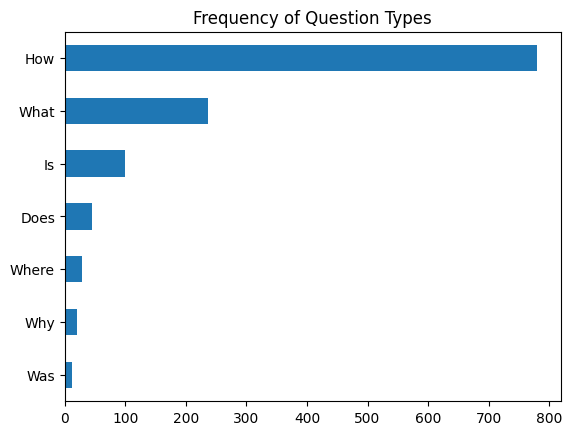

In [ ]:
import matplotlib.pyplot as plt
# 훈련 세트에 대략 어떤 종류의 질문이 있는지 확인
counts = {}
quections_types = ["What", "How", "Is", "Does", "Was", "Where", "Why"]

for q in quections_types:
    counts[q] = dfs["train"]["question"].str.startswith(q).value_counts().get(True)

pd.Series(counts).sort_values().plot.barh()
plt.title("Frequency of Question Types")
plt.show()

In [ ]:
for quections_types in ["How", "What", "Is"]:
    for question in(dfs["train"][dfs["train"].question.str.startswith(quections_types)].sample(3, random_state=42)["question"]):
        print(f"- {question}")

- How is the camera?
- How do you like the control?
- How fast is the charger?
- What is direction?
- What is the quality of the construction of the bag?
- What is your impression of the product?
- Is this how zoom works?
- Is sound clear?
- Is it a wireless keyboard?


7. SubjQA 형식인(질문, 리뷰 [답변])은 추출적 QA 데이터셋에서 널리 사용되는데, 스탠퍼드 질문 답변 데이터셋(SQuAD, Stanford Question Answering Dataset)에서 어음 사용된 방식이다.
    - 컴퓨터가 텍스트 문단을 읽고 관련 질문에 답변이 가능한지 테스트할 때 많이 사용된다.
    - 수백 개의 위키피디아 영어 문서에서 질문과 답변 쌍을 수집했다.
    - 최초 버전은 각 질문의 답이 해당 구절 안에 반드시 존재했다.
    - 작업의 난도를 높이기 위해 SQuAD 2.0에서는 답변이 없는 질문도 포함되었다.